In [4]:
#import libraries 
import matplotlib.pyplot as plt
import numpy as np

import skimage.io
from skimage.color import rgb2hsv
from skimage.exposure import equalize_adapthist

import cv2

import os

from rembg.bg import remove
import io
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# print(os.listdir("rice_leaf_diseases"))


In [3]:
#path folder penyakit
ori_blb_path = "rice_leaf_diseases/train/bacterial_leaf_blight/"
ori_bs_path = "rice_leaf_diseases/train/brown_spot/"
ori_ls_path = "rice_leaf_diseases/train/leaf_smut/"
ori_healthy_path = "rice_leaf_diseases/train/healthy/"

# path setelah color balanced
cb_blb_path = "rld_img_cb/blb/"
cb_bs_path = "rld_img_cb/bs/"
cb_ls_path = "rld_img_cb/ls/"
cb_healthy_path = "rld_img_cb/healthy/"


# path setelah histogram equalization
heq_blb_path = "rld_img_hequal/blb/"
heq_bs_path = "rld_img_hequal/bs/"
heq_ls_path = "rld_img_hequal/ls/"
heq_healthy_path = "rld_img_hequal/healthy/"


# path setelah rembg
r_blb_path = "rld_img_rembg/blb/"
r_bs_path = "rld_img_rembg/bs/"
r_ls_path = "rld_img_rembg/ls/"
r_healthy_path = "rld_img_rembg/healthy/"

In [9]:
import colorcorrect.algorithm as cca
from colorcorrect.util import from_pil, to_pil


def colorBalance(image, name, path):
  """
  Implement cca.max_white color correction algorithm 
    using colorcorrect library
  Args:
        image: image object that will be color balanced
        name: filename of the saved color balanced image
        path: color balanced image destination folder
  Returns: 
  """
  try:
    to_pil(cca.max_white(from_pil(image))).save(path + name)

  except Exception as e:
    print(f"Error : {e}")


In [11]:
# # image color balancing
# blb_os_path = os.listdir(ori_blb_path)
# for img_name in blb_os_path[:]:
#     read_img = Image.open(ori_blb_path + img_name)
#     colorBalance(read_img, img_name, cb_blb_path)

# bs_os_path = os.listdir(ori_bs_path)
# for img_name in bs_os_path[:]:
#     read_img = Image.open(ori_bs_path + img_name)
#     colorBalance(read_img, img_name, cb_bs_path)

# ls_os_path = os.listdir(ori_ls_path)
# for img_name in ls_os_path[:]:
#     read_img = Image.open(ori_ls_path + img_name)
#     colorBalance(read_img, img_name, cb_ls_path)

healthy_os_path = os.listdir(ori_healthy_path)
for img_name in healthy_os_path[:]:
    read_img = Image.open(ori_healthy_path + img_name)
    colorBalance(read_img, img_name, cb_healthy_path)

In [7]:
# histogram equalization based on https://www.etutorialspoint.com/index.php/311-python-opencv-histogram-equalization


def equalize_hist(image):
    """
    Image enhancement using histogram equalization discrete function 
    Args:
        path_img_input: path of the input image folder directory in string
        path_save: destination path of equalized background image 
    Returns: 
        hist_eq: image after histogram equalization
    """

    #convert to YUV 
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

    # apply equalization histogram
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    hist_eq = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    return hist_eq


# blb_os_path = os.listdir(cb_blb_path)
# for img_name in blb_os_path[:]:
#     read_img = cv2.imread(cb_blb_path + img_name)

#     hist_eq = equalize_hist(read_img)

#     cv2.imwrite(heq_blb_path + img_name, hist_eq)


# bs_os_path = os.listdir(cb_bs_path)
# for img_name in bs_os_path[:]:
#     read_img = cv2.imread(cb_bs_path + img_name)
#     hist_eq = equalize_hist(read_img)

#     cv2.imwrite(heq_bs_path + img_name, hist_eq)

# ls_os_path = os.listdir(cb_ls_path)
# for img_name in ls_os_path[:]:
#     read_img = cv2.imread(cb_ls_path + img_name)
#     hist_eq = equalize_hist(read_img)

#     cv2.imwrite(heq_ls_path + img_name, hist_eq)

In [15]:

# blb_os_path = os.listdir(ori_blb_path)
# for img_name in blb_os_path[:]:
#     read_img = cv2.imread(ori_blb_path + img_name) #read image from path
#     r_bg_img = remove(
#                 read_img,
#                 True,
#                 240,
#                 10,
#                 50,
#                 None,
#                 True,
#             )
#     cv2.imwrite(r_blb_path + img_name, r_bg_img)

# bs_os_path = os.listdir(ori_bs_path)
# for img_name in bs_os_path[:]:
#     read_img = cv2.imread(ori_bs_path + img_name) #read image from path
#     r_bg_img = remove(
#                 read_img,
#                 True,
#                 240,
#                 10,
#                 50,
#                 None,
#                 True,
#             )
#     cv2.imwrite(r_bs_path + img_name, r_bg_img)

# ls_os_path = os.listdir(ori_ls_path)
# for img_name in blb_os_path[:]:
#     read_img = cv2.imread(ori_ls_path + img_name) #read image from path
#     r_bg_img = remove(
#                 read_img,
#                 # True,
#                 # 240,
#                 # 10,
#                 # 50,
#                 # None,
#                 # True,
#             )
#     cv2.imwrite(r_ls_path + img_name, r_bg_img)

healthy_os_path = os.listdir(ori_healthy_path)
for img_name in healthy_os_path[:]:
    read_img = cv2.imread(ori_healthy_path + img_name) #read image from path
    r_bg_img = remove(
                read_img,
                # True,
                # 240,
                # 10,
                # 50,
                # None,
                # True,
            )
    cv2.imwrite(r_healthy_path + img_name, r_bg_img)
        


In [ ]:
# def getRGB(event,x,y,flags,param): #(Based from stackoverflow by Wicaledon to get RGB color values from clicked pixel of an image)
#     if event == cv2.EVENT_LBUTTONDOWN: #checks mouse left button down condition
#         colorsR = image[y,x,2]
#         colorsG = image[y,x,1]
#         colorsB = image[y,x,0]
#         colors = image[y,x]
#         print("RGB Format: ",colors)
#         print("Pixel Coordinates: X: ",x,"Y: ",y)

# image = cv2.imread("rice_leaf_diseases/bacterial_leaf_blight/DSC_0365.jpg")
# cv2.namedWindow('getRGB')
# cv2.setMouseCallback('getRGB',getRGB)

# #Do until esc pressed
# while(1):
#     cv2.imshow('getRGB',image)
#     if cv2.waitKey(20) & 0xFF == 27:
#         break
# #if esc pressed, finish.
# cv2.destroyAllWindows()

Text(0.5, 1.0, 'Value')

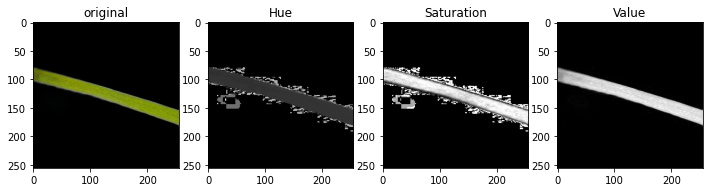

In [33]:
x = cv2.imread("rld_img_rembg/healthy/shape_5_.jpg") #read image from path
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB) #convert image color to RGB
leaf_disease_hsv = rgb2hsv(x) #convert RGB image to HSV (Based on from https://mattmaulion.medium.com/color-image-segmentation-image-processing-4a04eca25c0 by Matt Maulion)

# print(x.shape)
fig, ax = plt.subplots(1, 4, figsize=(12,4))
ax[0].imshow(x)
ax[0].set_title('original')
ax[1].imshow(leaf_disease_hsv[:,:,0], cmap='gray')
ax[1].set_title('Hue')
ax[2].imshow(leaf_disease_hsv[:,:,1], cmap='gray')
ax[2].set_title('Saturation')
ax[3].imshow(leaf_disease_hsv[:,:,2], cmap='gray')
ax[3].set_title('Value')


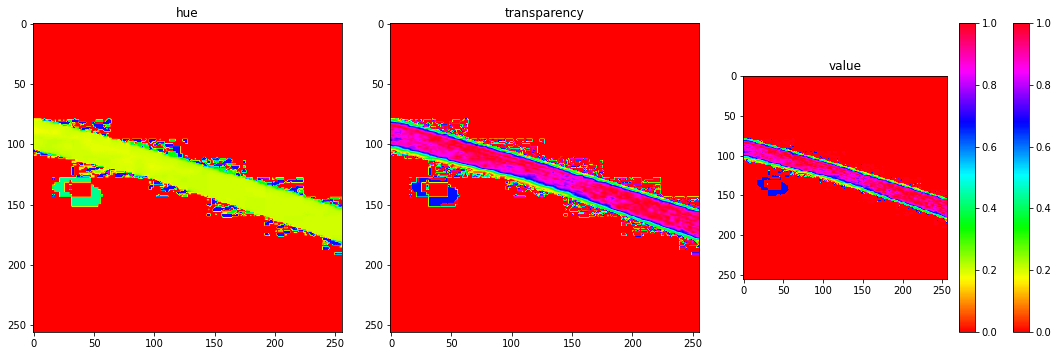

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(leaf_disease_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(leaf_disease_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(leaf_disease_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(skimage.io.imshow(leaf_disease_hsv[:,:,0],cmap='hsv')) 
fig.colorbar(skimage.io.imshow(leaf_disease_hsv[:,:,1],cmap='hsv')) 
# fig.colorbar(imshow(leaf_disease_hsv[:,:,2],cmap='hsv')) 

fig.tight_layout()


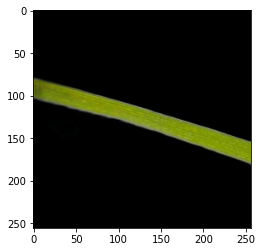

In [35]:
#lower hue 
lower_hue_mask = leaf_disease_hsv[:,:,0] > 0.0
#upper hue
upper_hue_mask = leaf_disease_hsv[:,:,0] < 1.0
#transparensi
# lower_saturation_mask = leaf_disease_hsv[:,:,1] > 0.5
# upper_saturation_mask = leaf_disease_hsv[:,:,1] < 0.8

 
mask_segment = upper_hue_mask*lower_hue_mask
red = x[:,:,0]*mask_segment
green = x[:,:,1]*mask_segment
blue = x[:,:,2]*mask_segment
bags_masked = np.dstack((red,green,blue))
plt.imshow(bags_masked)


In [7]:
# path mask
m_blb_path = "rld_mask/blb/"
m_bs_path = "rld_mask/bs/"
m_ls_path = "rld_mask/ls/"
m_healthy_path = "rld_mask/healthy/"


def create_hue_mask(hsv_img, lower_hue_val, upper_hue_val):
    """
    Create mask of images from path_r and save them to 
        path_m using hue segmentation
    Args:
        hsv_img: image in HSV 
        lower_hue_val: lowest hue threshold value
        upper_hue_val: highest hue threshold value
    Returns: 
    """
    try:     
        # Hue segment
        img_hue = hsv_img[:,:,0]
        l_mask = img_hue > lower_hue_val
        u_mask = img_hue < upper_hue_val
        hue_mask = u_mask * l_mask
        return hue_mask
    except Exception as e:
        print(f"Error : {e}")
        

In [60]:

# blb_os_path = os.listdir(r_blb_path)
# for img_name in blb_os_path[:]:
#     try: 
#         read_img = cv2.imread(r_blb_path + img_name) #read image from path
#         read_rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
#         read_hsv_img = rgb2hsv(read_rgb_img)

#         mask_img = create_hue_mask(read_hsv_img, 0.05, 0.15)
#         plt.imsave(m_blb_path + img_name, mask_img, cmap="gray") 
#     except Exception as e:
#         print(f"Error : {e} at image {img_name}")

# bs_os_path = os.listdir(r_bs_path)
# for img_name in bs_os_path[:]:
#     try: 
#         read_img = cv2.imread(r_bs_path + img_name) #read image from path
#         read_rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
#         read_hsv_img = rgb2hsv(read_rgb_img)

#         mask_img = create_hue_mask(read_hsv_img)
#         plt.imsave(m_bs_path + img_name, mask_img, cmap="gray") 
#     except Exception as e:
#         print(f"Error : {e} at image {img_name}")

# ls_os_path = os.listdir(r_ls_path)
# for img_name in ls_os_path[:]:
#     try: 
#         read_img = cv2.imread(r_ls_path + img_name) #read image from path
#         read_rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
#         read_hsv_img = rgb2hsv(read_rgb_img)

#         mask_img = create_hue_mask(read_hsv_img)
#         plt.imsave(m_ls_path + img_name, mask_img, cmap="gray") 
#     except Exception as e:
#         print(f"Error : {e} at image {img_name}")

healthy_os_path = os.listdir(r_healthy_path)
for img_name in healthy_os_path[:]:
    try:
        read_img = cv2.imread(r_healthy_path + img_name) #read image from path
        
        read_rgb_img = cv2.cvtColor(read_img, cv2.COLOR_BGR2RGB)
        read_hsv_img = rgb2hsv(read_rgb_img)

        mask_img = create_hue_mask(read_hsv_img, 0.0, 1.0)
        plt.imsave(m_healthy_path + img_name, mask_img, cmap="gray") 
    except Exception as e:
            print(f"Error : {e} at image {img_name}")





In [13]:
# path segment img
seg_blb_path = "segment_img/blb/"
seg_bs_path = "segment_img/bs/"
seg_ls_path = "segment_img/ls/"
seg_healthy_path = "segment_img/healthy/"


def segment_disease(ori_img, mask_img):
    """
    Segment disease from the paddy leaf
    Args:
        ori_img: original image
        mask_img: mask image 
    Returns: 
        res: segment disease image array
    """

    try: 
        res = cv2.bitwise_and(ori_img, mask_img)
        return res
    except Exception as e:
        print(f"Error : {e}")

In [15]:
# r_os_path = os.listdir(r_blb_path)
# for img_name in r_os_path[:]:
#     try: 
#         ori_img = cv2.imread(r_blb_path + img_name) #read ori image from path
#         mask_img = cv2.imread(r_blb_path + img_name) #read image from path
#         result = segment_disease(ori_img, mask_img)
#         cv2.imwrite(r_blb_path + img_name, seg_blb_path)
#     except Exception as e:
#         print(f"Error : {e} at image {img_name}")

# r_os_path = os.listdir(r_bs_path)
# for img_name in r_os_path[:]:
#     try: 
#         ori_img = cv2.imread(r_bs_path + img_name) #read ori image from path
#         mask_img = cv2.imread(r_bs_path + img_name) #read image from path
#         result = segment_disease(ori_img, mask_img)
#         cv2.imwrite(r_bs_path + img_name, seg_bs_path)
#     except Exception as e:
#         print(f"Error : {e} at image {img_name}")

# r_os_path = os.listdir(r_ls_path)
# for img_name in r_os_path[:]:
#     try: 
#         ori_img = cv2.imread(ori_ls_path + img_name) #read ori image from path
#         mask_img = cv2.imread(m_ls_path + img_name) #read image from path
#         result = segment_disease(ori_img, mask_img)
#         cv2.imwrite(r_ls_path + img_name, seg_ls_path)
#     except Exception as e:
#         print(f"Error : {e} at image {img_name}")

r_os_path = os.listdir(r_healthy_path)
for img_name in r_os_path[:]:
    try: 
        ori_img = cv2.imread(ori_healthy_path + img_name) #read ori image from path
        mask_img = cv2.imread(m_healthy_path + img_name) #read image from path
        result = segment_disease(ori_img, mask_img)
        cv2.imwrite(seg_healthy_path + img_name, result)
    except Exception as e:
            print(f"Error : {e} at image {img_name}")


Image Classifier 5Conv2Dense was based from this site -> https://github.com/ejmmedina/rice-disease-classification/blob/master/riceimg-clf-ml2.ipynb

In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential, load_model, model_from_json
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


2022-04-16 16:37:43.333978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-16 16:37:43.334022: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
EPOCHS = 50
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'segment_img'
width=256
height=256
depth=3

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for disease_folder in root_dir :
        plant_disease_image_list = listdir(f"{directory_root}/{disease_folder}")
        
        for image in plant_disease_image_list:
            image_directory = f"{directory_root}/{disease_folder}/{image}"
            if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Image loading completed


In [6]:
image_size = len(image_list)
print(image_size)

840


In [7]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [8]:
print(label_binarizer.classes_)


['blb' 'bs' 'ls']


In [9]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0


In [10]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [11]:
aug = ImageDataGenerator(
    rotation_range=30, width_shift_range=0.15,
    height_shift_range=0.15, shear_range=0.15, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [12]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

2022-04-16 16:38:43.357336: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-16 16:38:43.357930: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-16 16:38:43.358030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-16 16:38:43.358131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-04-16 16:38:43.358216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [13]:
# distribution
model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [14]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model_5conv2dense_woutBG.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto') 

In [15]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1,
    callbacks=[checkpoint]
)

/tmp/ipykernel_81399/835241677.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50


2022-04-16 16:39:06.158227: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.
2022-04-16 16:39:06.343947: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.
2022-04-16 16:39:09.708604: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.


 1/21 [>.............................] - ETA: 2:05 - loss: 0.9928 - accuracy: 0.3438

2022-04-16 16:39:10.487629: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.
2022-04-16 16:39:10.656682: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.


21/21 [==============================] - ETA: 0s - loss: 0.7836 - accuracy: 0.5476
Epoch 1: val_accuracy improved from -inf to 0.32143, saving model to best_model_5conv2dense_woutBG.h5
21/21 [==============================] - 96s 4s/step - loss: 0.7836 - accuracy: 0.5476 - val_loss: 0.8889 - val_accuracy: 0.3214
Epoch 2/50
21/21 [==============================] - ETA: 0s - loss: 0.5835 - accuracy: 0.6339
Epoch 2: val_accuracy did not improve from 0.32143
21/21 [==============================] - 115s 5s/step - loss: 0.5835 - accuracy: 0.6339 - val_loss: 0.9663 - val_accuracy: 0.3214
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 0.4996 - accuracy: 0.6890
Epoch 3: val_accuracy did not improve from 0.32143
21/21 [==============================] - 95s 5s/step - loss: 0.4996 - accuracy: 0.6890 - val_loss: 1.0920 - val_accuracy: 0.3214
Epoch 4/50
21/21 [==============================] - ETA: 0s - loss: 0.4004 - accuracy: 0.7440
Epoch 4: val_accuracy did not improve from 

In [16]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

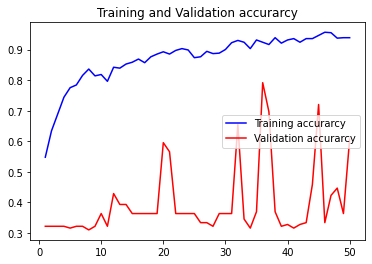

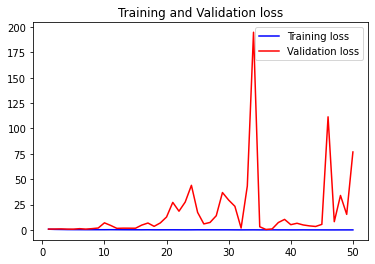

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [18]:
model = load_model('best_model_5conv2dense_woutBG.h5')


json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["accuracy"])

# load weights into new model
loaded_model.load_weights("best_model_5conv2dense_woutBG.h5")

In [20]:
print("[INFO] Calculating model accuracy")
scores = loaded_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
6/6 [==============================] - 4s 724ms/step - loss: 0.5275 - accuracy: 0.7917
Test Accuracy: 79.16666865348816
